#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

#Importing Dataset

In [2]:
path = "/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv"
daily_data = pd.read_csv(path)
daily_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


#Convert the time variables to numeric

In [3]:
from datetime import datetime

def convert_time_to_numeric(time_str):
    # Define the format
    time_format = '%I:%M %p'

    # Parse the time string
    time_obj = datetime.strptime(time_str, time_format)

    # Extract hour and minute
    hour = time_obj.hour
    minute = time_obj.minute

    # Convert to numeric value (decimal hours)
    numeric_time = hour + minute / 60

    return numeric_time

# Test the function
times1= daily_data['sunrise']
daily_data['sunrise_new'] = [convert_time_to_numeric(time) for time in times1]

times2= daily_data['sunset']
daily_data['sunset_new'] = [convert_time_to_numeric(time) for time in times2]

#Convert city_id(object variable) to numeric

In [4]:
daily_data['city_id_new'] = daily_data['city_id'].str.extract(r'(\d+)', expand=False)
daily_data['city_id_new']=pd.to_numeric(daily_data['city_id_new'])

Seperate rows which are contain null values

In [5]:
rows_with_nulls = daily_data[daily_data.isnull().any(axis=1)]
rows_with_nulls =pd.DataFrame(rows_with_nulls)
rows_with_nulls

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,sunrise_new,sunset_new,city_id_new
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM,6.066667,19.316667,1
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM,6.083333,19.300000,1
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM,6.116667,19.250000,1
5,D0006,C001,20.0,NaN,3.6,96,1019.0,0.0,88,0,20.0,10.0,1.0,11.2,1,06:07 AM,07:13 PM,6.116667,19.216667,1
7,D0008,C001,21.0,NaN,20.2,330,1011.0,0.0,53,75,21.0,10.0,1.0,17.3,1,06:09 AM,07:10 PM,6.150000,19.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,D2888,C112,19.5,NaN,16.6,113,1015.0,0.0,38,0,19.5,10.0,1.0,26.7,1,05:50 AM,05:51 PM,5.833333,17.850000,112
2889,D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM,5.816667,17.866667,112
2890,D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM,5.800000,17.866667,112
2891,D2892,C112,19.2,NaN,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM,5.783333,17.866667,112


#Data cleaning

In [6]:
daily_data_new=daily_data.dropna()
daily_data_new

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,sunrise_new,sunset_new,city_id_new
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.50,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM,6.083333,19.300000,1
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.00,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM,6.100000,19.266667,1
6,D0007,C001,21.0,Partly Cloudy,4.0,310,1015.0,0.00,100,50,21.0,10.0,1.0,15.1,2,06:08 AM,07:11 PM,6.133333,19.183333,1
18,D0019,C001,19.0,Clear and Sunny,3.6,64,1017.0,0.00,88,0,19.0,10.0,1.0,8.3,3,06:20 AM,06:51 PM,6.333333,18.850000,1
27,D0028,C002,19.0,Partly Cloudy,3.6,83,1010.0,0.00,73,25,19.0,10.0,1.0,8.3,1,06:17 AM,07:20 PM,6.283333,19.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,D2839,C110,27.0,Partly Cloudy,19.1,90,1014.0,0.01,70,25,29.8,10.0,6.0,45.6,1,05:39 AM,05:43 PM,5.650000,17.716667,110
2863,D2864,C111,21.4,Light Precipitation,3.6,178,1012.0,0.00,89,75,21.4,10.0,6.0,6.6,1,06:17 AM,06:25 PM,6.283333,18.416667,111
2873,D2874,C112,16.9,Clear and Sunny,16.6,68,1018.0,0.00,44,2,16.9,10.0,1.0,27.0,1,06:02 AM,05:49 PM,6.033333,17.816667,112
2886,D2887,C112,19.5,Clear and Sunny,5.4,27,1014.0,0.00,34,0,19.4,10.0,1.0,11.2,2,05:51 AM,05:51 PM,5.850000,17.850000,112


Feature Selection

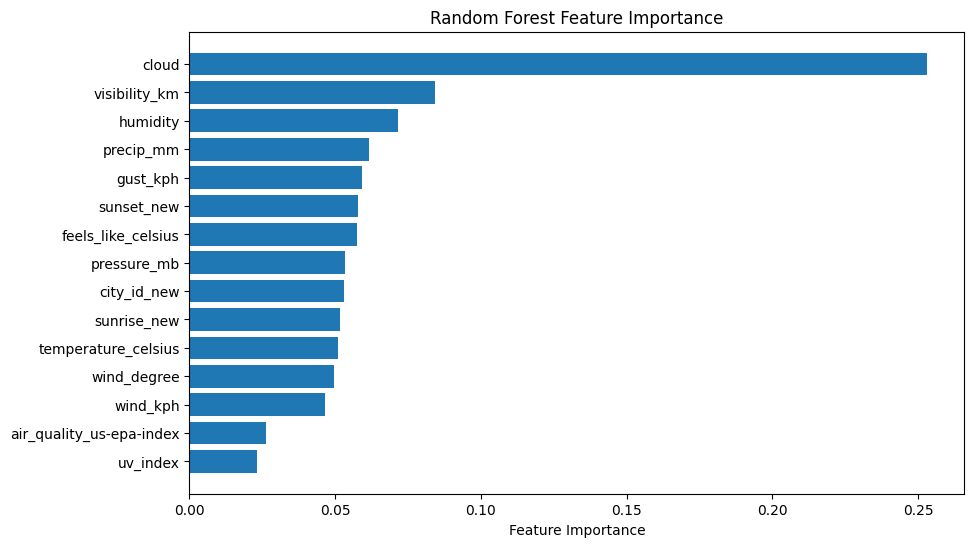

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing all relevant columns
X = daily_data_new[['city_id_new','temperature_celsius', 'wind_kph','wind_degree','pressure_mb','precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index','sunrise_new','sunset_new']]
y = daily_data_new['condition_text']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Plot feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [8]:
daily_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2 to 2888
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    479 non-null    object 
 1   city_id                   479 non-null    object 
 2   temperature_celsius       479 non-null    float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  479 non-null    float64
 5   wind_degree               479 non-null    int64  
 6   pressure_mb               479 non-null    float64
 7   precip_mm                 479 non-null    float64
 8   humidity                  479 non-null    int64  
 9   cloud                     479 non-null    int64  
 10  feels_like_celsius        479 non-null    float64
 11  visibility_km             479 non-null    float64
 12  uv_index                  479 non-null    float64
 13  gust_kph                  479 non-null    float64
 14  air_quality_us

In [9]:
X = daily_data_new.iloc[:,[2,5,6,7,8,9,10,11,13,17,18,19]].values
Y = daily_data_new.iloc[:,3].values

X.shape

(479, 12)

In [10]:
print(X)

[[2.00000000e+01 1.00000000e+01 1.01100000e+03 ... 6.08333333e+00
  1.93000000e+01 1.00000000e+00]
 [1.70000000e+01 1.50000000e+02 1.01800000e+03 ... 6.10000000e+00
  1.92666667e+01 1.00000000e+00]
 [2.10000000e+01 3.10000000e+02 1.01500000e+03 ... 6.13333333e+00
  1.91833333e+01 1.00000000e+00]
 ...
 [1.69000000e+01 6.80000000e+01 1.01800000e+03 ... 6.03333333e+00
  1.78166667e+01 1.12000000e+02]
 [1.95000000e+01 2.70000000e+01 1.01400000e+03 ... 5.85000000e+00
  1.78500000e+01 1.12000000e+02]
 [1.71000000e+01 6.10000000e+01 1.01700000e+03 ... 5.81666667e+00
  1.78500000e+01 1.12000000e+02]]


In [11]:
print(Y)

['Light Rain with Thunder' 'Clear and Sunny' 'Partly Cloudy'
 'Clear and Sunny' 'Partly Cloudy' 'Partly Cloudy'
 'Light Rain with Thunder' 'Light Precipitation' 'Cloudy and Overcast'
 'Cloudy and Overcast' 'Partly Cloudy' 'Cloudy and Overcast'
 'Clear and Sunny' 'Cloudy and Overcast' 'Clear and Sunny'
 'Clear and Sunny' 'Partly Cloudy' 'Light Precipitation' 'Clear and Sunny'
 'Clear and Sunny' 'Light Precipitation' 'Clear and Sunny'
 'Clear and Sunny' 'Clear and Sunny' 'Clear and Sunny' 'Clear and Sunny'
 'Clear and Sunny' 'Mist or Fog' 'Clear and Sunny' 'Cloudy and Overcast'
 'Light Precipitation' 'Rain Showers' 'Partly Cloudy'
 'Light Precipitation' 'Cloudy and Overcast' 'Rain Showers'
 'Partly Cloudy' 'Cloudy and Overcast' 'Light Rain with Thunder'
 'Light Precipitation' 'Moderate to Heavy Rain' 'Light Precipitation'
 'Light Precipitation' 'Clear and Sunny' 'Mist or Fog' 'Clear and Sunny'
 'Cloudy and Overcast' 'Mist or Fog' 'Clear and Sunny' 'Clear and Sunny'
 'Light Precipitation'

In [12]:
Y = Y.reshape(-1,1)
print(Y)

[['Light Rain with Thunder']
 ['Clear and Sunny']
 ['Partly Cloudy']
 ['Clear and Sunny']
 ['Partly Cloudy']
 ['Partly Cloudy']
 ['Light Rain with Thunder']
 ['Light Precipitation']
 ['Cloudy and Overcast']
 ['Cloudy and Overcast']
 ['Partly Cloudy']
 ['Cloudy and Overcast']
 ['Clear and Sunny']
 ['Cloudy and Overcast']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Partly Cloudy']
 ['Light Precipitation']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Light Precipitation']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Clear and Sunny']
 ['Mist or Fog']
 ['Clear and Sunny']
 ['Cloudy and Overcast']
 ['Light Precipitation']
 ['Rain Showers']
 ['Partly Cloudy']
 ['Light Precipitation']
 ['Cloudy and Overcast']
 ['Rain Showers']
 ['Partly Cloudy']
 ['Cloudy and Overcast']
 ['Light Rain with Thunder']
 ['Light Precipitation']
 ['Moderate to Heavy Rain']
 ['Light Precipitation']
 ['Light Precipitation']
 ['Clear and Sunny']
 ['Mist o

#Encoding Dataset

In [13]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
Y = le1.fit_transform(Y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
print(Y)

[3 0 6 0 6 6 3 2 1 1 6 1 0 1 0 0 6 2 0 0 2 0 0 0 0 0 0 4 0 1 2 7 6 2 1 7 6
 1 3 2 5 2 2 0 4 0 1 4 0 0 2 0 0 0 8 2 2 2 2 6 2 6 2 0 2 6 6 6 6 2 8 3 2 6
 6 3 1 6 4 5 1 0 4 4 4 4 0 2 6 0 0 0 4 1 1 0 0 0 0 0 0 4 4 4 7 7 6 6 1 8 6
 3 6 6 6 7 6 1 3 4 6 4 6 0 4 5 6 6 6 8 4 4 4 7 6 6 1 6 0 0 0 0 4 0 0 6 1 6
 6 6 6 6 8 6 1 0 2 6 1 2 0 0 0 0 0 0 1 6 0 3 2 7 6 6 2 4 6 6 6 7 7 6 4 4 4
 4 4 4 4 4 8 4 4 4 4 4 4 4 4 4 4 6 0 0 2 6 2 2 2 5 6 0 0 0 2 7 6 1 7 6 2 6
 6 2 2 7 2 6 7 2 2 0 2 2 2 2 0 4 0 4 4 2 1 6 0 0 1 6 0 1 4 6 0 2 0 6 6 6 6
 6 8 8 0 8 6 0 5 6 1 2 7 6 6 1 1 1 1 1 6 6 1 6 1 6 1 0 0 0 6 0 7 7 6 6 0 5
 0 6 6 0 0 0 0 6 6 0 0 0 6 8 3 6 1 1 1 2 6 3 8 6 6 2 0 3 8 3 7 0 4 7 2 6 0
 1 2 2 6 0 0 0 0 2 2 2 2 2 2 2 2 2 6 0 0 6 0 0 0 6 4 6 0 4 3 2 6 6 2 6 6 6
 6 6 6 0 0 6 6 0 0 0 0 0 7 3 8 3 0 0 5 5 2 1 6 1 2 7 6 6 2 6 1 2 6 7 2 0 2
 0 0 2 2 6 0 6 1 8 4 6 5 6 3 0 6 0 0 0 2 0 1 0 6 1 1 5 0 0 0 0 6 6 8 0 6 0
 6 1 6 1 0 6 6 0 4 4 2 4 6 1 4 1 1 1 0 1 6 0 0 1 5 6 6 1 5 1 6 2 0 0 0]


#Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

print(X)

[[-0.32568728 -1.49111486 -0.34581332 ... -0.47130925  0.60289124
  -1.7516321 ]
 [-0.7911862  -0.08478654  0.80221842 ... -0.43911802  0.55929448
  -1.7516321 ]
 [-0.17052097  1.52244583  0.31020482 ... -0.37473555  0.4503026
  -1.7516321 ]
 ...
 [-0.80670283 -0.90849313  0.80221842 ... -0.56788296 -1.33716435
   1.88082342]
 [-0.40327043 -1.32034642  0.14620028 ... -0.92198655 -1.29356759
   1.88082342]
 [-0.77566957 -0.97880954  0.63821389 ... -0.98636902 -1.29356759
   1.88082342]]


#Spliting Dataset into Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Traing Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300,random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [18]:
classifier.score(X_train, Y_train)

1.0

In [19]:
Y_test = Y_test.reshape(-1,1)
print(Y_test)

[[0]
 [4]
 [0]
 [8]
 [2]
 [4]
 [0]
 [1]
 [6]
 [0]
 [2]
 [3]
 [8]
 [0]
 [4]
 [7]
 [3]
 [4]
 [3]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]
 [6]
 [6]
 [2]
 [0]
 [2]
 [1]
 [0]
 [6]
 [6]
 [0]
 [7]
 [6]
 [4]
 [6]
 [6]
 [6]
 [4]
 [6]
 [0]
 [6]
 [0]
 [7]
 [2]
 [1]
 [4]
 [4]
 [6]
 [3]
 [4]
 [4]
 [0]
 [0]
 [0]
 [0]
 [8]
 [2]
 [6]
 [8]
 [6]
 [4]
 [2]
 [6]
 [1]
 [0]
 [6]
 [0]
 [8]
 [5]
 [0]
 [1]
 [0]
 [1]
 [2]
 [0]
 [2]
 [4]
 [3]
 [6]
 [3]
 [0]
 [6]
 [0]
 [6]
 [2]
 [3]
 [1]
 [8]
 [4]
 [6]
 [1]
 [4]]


In [20]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 6 0 6 5 2 0 1 6 0 2 2 6 0 6 7 6 0 4 0 2 0 0 6 6 6 6 6 0 2 1 0 6 6 0 2 6
 0 6 6 6 2 6 0 6 0 2 2 1 4 4 6 6 4 0 0 4 0 0 2 1 6 6 6 4 6 6 1 0 6 0 1 2 6
 1 0 1 2 0 2 4 6 6 6 0 6 0 6 7 6 1 6 6 6 1 4]


In [21]:
y_pred = le1.inverse_transform(y_pred)

print(y_pred)

['Clear and Sunny' 'Partly Cloudy' 'Clear and Sunny' 'Partly Cloudy'
 'Moderate to Heavy Rain' 'Light Precipitation' 'Clear and Sunny'
 'Cloudy and Overcast' 'Partly Cloudy' 'Clear and Sunny'
 'Light Precipitation' 'Light Precipitation' 'Partly Cloudy'
 'Clear and Sunny' 'Partly Cloudy' 'Rain Showers' 'Partly Cloudy'
 'Clear and Sunny' 'Mist or Fog' 'Clear and Sunny' 'Light Precipitation'
 'Clear and Sunny' 'Clear and Sunny' 'Partly Cloudy' 'Partly Cloudy'
 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy' 'Clear and Sunny'
 'Light Precipitation' 'Cloudy and Overcast' 'Clear and Sunny'
 'Partly Cloudy' 'Partly Cloudy' 'Clear and Sunny' 'Light Precipitation'
 'Partly Cloudy' 'Clear and Sunny' 'Partly Cloudy' 'Partly Cloudy'
 'Partly Cloudy' 'Light Precipitation' 'Partly Cloudy' 'Clear and Sunny'
 'Partly Cloudy' 'Clear and Sunny' 'Light Precipitation'
 'Light Precipitation' 'Cloudy and Overcast' 'Mist or Fog' 'Mist or Fog'
 'Partly Cloudy' 'Partly Cloudy' 'Mist or Fog' 'Clear and Sunny'
 

In [22]:
Y_test = le1.inverse_transform(Y_test)

print(Y_test)

['Clear and Sunny' 'Mist or Fog' 'Clear and Sunny' 'Thunderstorms'
 'Light Precipitation' 'Mist or Fog' 'Clear and Sunny'
 'Cloudy and Overcast' 'Partly Cloudy' 'Clear and Sunny'
 'Light Precipitation' 'Light Rain with Thunder' 'Thunderstorms'
 'Clear and Sunny' 'Mist or Fog' 'Rain Showers' 'Light Rain with Thunder'
 'Mist or Fog' 'Light Rain with Thunder' 'Clear and Sunny'
 'Cloudy and Overcast' 'Clear and Sunny' 'Clear and Sunny'
 'Cloudy and Overcast' 'Light Precipitation' 'Partly Cloudy'
 'Partly Cloudy' 'Light Precipitation' 'Clear and Sunny'
 'Light Precipitation' 'Cloudy and Overcast' 'Clear and Sunny'
 'Partly Cloudy' 'Partly Cloudy' 'Clear and Sunny' 'Rain Showers'
 'Partly Cloudy' 'Mist or Fog' 'Partly Cloudy' 'Partly Cloudy'
 'Partly Cloudy' 'Mist or Fog' 'Partly Cloudy' 'Clear and Sunny'
 'Partly Cloudy' 'Clear and Sunny' 'Rain Showers' 'Light Precipitation'
 'Cloudy and Overcast' 'Mist or Fog' 'Mist or Fog' 'Partly Cloudy'
 'Light Rain with Thunder' 'Mist or Fog' 'Mist or 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Find number of correct prediction

In [23]:
# Define two arrays
array1 = y_pred
array2 = Y_test

# Initialize a counter
count_equal = 0

# Iterate through both arrays and compare elements
for a, b in zip(array1, array2):
    if a == b:
        count_equal += 1

print(f"Number of equal elements: {count_equal}")

prob=count_equal/len(Y_test)
print(prob)

Number of equal elements: 62
0.6458333333333334


In [24]:
Y_test = Y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [25]:
df = np.concatenate((Y_test,y_pred),axis=1)
df1 = pd.DataFrame(df,columns=['condition_text','predict_codition_text'])
df1

,condition_text,predict_codition_text
0,Clear and Sunny,Clear and Sunny
1,Mist or Fog,Partly Cloudy
2,Clear and Sunny,Clear and Sunny
3,Thunderstorms,Partly Cloudy
4,Light Precipitation,Moderate to Heavy Rain
...,...,...
91,Thunderstorms,Partly Cloudy
92,Mist or Fog,Partly Cloudy
93,Partly Cloudy,Partly Cloudy
94,Cloudy and Overcast,Cloudy and Overcast


Calculating Accuracy

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.6458333333333334

#Predict missing codition_text

In [27]:
X1 = rows_with_nulls.iloc[:,[2,5,6,7,8,9,10,11,13,17,18,19]].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

y_pred1 = classifier.predict(X1)
y_pred1 = le1.inverse_transform(y_pred1)

rows_with_nulls['condition_text'] = y_pred1
rows_with_nulls

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,sunrise_new,sunset_new,city_id_new
0,D0001,C001,27.0,Light Precipitation,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM,6.066667,19.316667,1
1,D0002,C001,22.0,Cloudy and Overcast,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM,6.083333,19.300000,1
4,D0005,C001,18.0,Clear and Sunny,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM,6.116667,19.250000,1
5,D0006,C001,20.0,Clear and Sunny,3.6,96,1019.0,0.0,88,0,20.0,10.0,1.0,11.2,1,06:07 AM,07:13 PM,6.116667,19.216667,1
7,D0008,C001,21.0,Cloudy and Overcast,20.2,330,1011.0,0.0,53,75,21.0,10.0,1.0,17.3,1,06:09 AM,07:10 PM,6.150000,19.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,D2888,C112,19.5,Clear and Sunny,16.6,113,1015.0,0.0,38,0,19.5,10.0,1.0,26.7,1,05:50 AM,05:51 PM,5.833333,17.850000,112
2889,D2890,C112,17.4,Clear and Sunny,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM,5.816667,17.866667,112
2890,D2891,C112,19.2,Clear and Sunny,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM,5.800000,17.866667,112
2891,D2892,C112,19.2,Clear and Sunny,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM,5.783333,17.866667,112


select day_id and condtion text columns

In [28]:
submissions1=rows_with_nulls[['day_id','condition_text']]
submissions1

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
4,D0005,Clear and Sunny
5,D0006,Clear and Sunny
7,D0008,Cloudy and Overcast
...,...,...
2887,D2888,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


In [29]:
submissions2=pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv")
submissions2=submissions2.dropna()
submissions2

,day_id,condition_text
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
6,D0007,Partly Cloudy
18,D0019,Clear and Sunny
27,D0028,Partly Cloudy
...,...,...
2838,D2839,Partly Cloudy
2863,D2864,Light Precipitation
2873,D2874,Clear and Sunny
2886,D2887,Clear and Sunny


Merge these two data frame to one and rearrange by desending order by day_id

In [30]:
submissions=pd.concat([submissions1,submissions2],axis=0)
submissions['day_id_new'] = submissions['day_id'].str.extract(r'(\d+)', expand=False)
submissions['day_id_new']=pd.to_numeric(submissions['day_id_new'])
submissions=submissions.sort_values(by='day_id_new')
submissions=submissions.drop('day_id_new',axis=1)
submissions

,day_id,condition_text
0,D0001,Light Precipitation
1,D0002,Cloudy and Overcast
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


#Save the data frame as csv file

In [31]:
submissions=pd.DataFrame(submissions)

# Specify the file path
file_path = "/kaggle/working/submission.csv"

# Save the DataFrame to CSV
submissions.to_csv(file_path, index=False)